<a href="https://colab.research.google.com/github/farros123/Traffic-Prediction/blob/main/VisualisasiData_Predicted_Traffic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
%matplotlib inline

import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.base import BaseEstimator, TransformerMixin, ClassifierMixin, clone
from sklearn.model_selection import KFold
from scipy import stats
from scipy.stats import norm, skew
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import SelectFromModel
import warnings
warnings.filterwarnings('ignore')


In [ ]:
df = pd.read_csv('drive/MyDrive/Datviz/Traffic.csv')
df.head(96)

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal
...,...,...,...,...,...,...,...,...,...
91,10:45:00 PM,10,Tuesday,11,1,0,29,41,normal
92,11:00:00 PM,10,Tuesday,18,2,1,13,34,normal
93,11:15:00 PM,10,Tuesday,15,0,1,11,27,low
94,11:30:00 PM,10,Tuesday,14,1,0,33,48,normal


In [ ]:
df.shape

(2976, 9)

In [ ]:
df.isnull().sum()

Time                 0
Date                 0
Day of the week      0
CarCount             0
BikeCount            0
BusCount             0
TruckCount           0
Total                0
Traffic Situation    0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
have_duplicate_rows = df.duplicated().any()
have_duplicate_rows

False

In [ ]:
df_1d = df.head(96)
df.head()

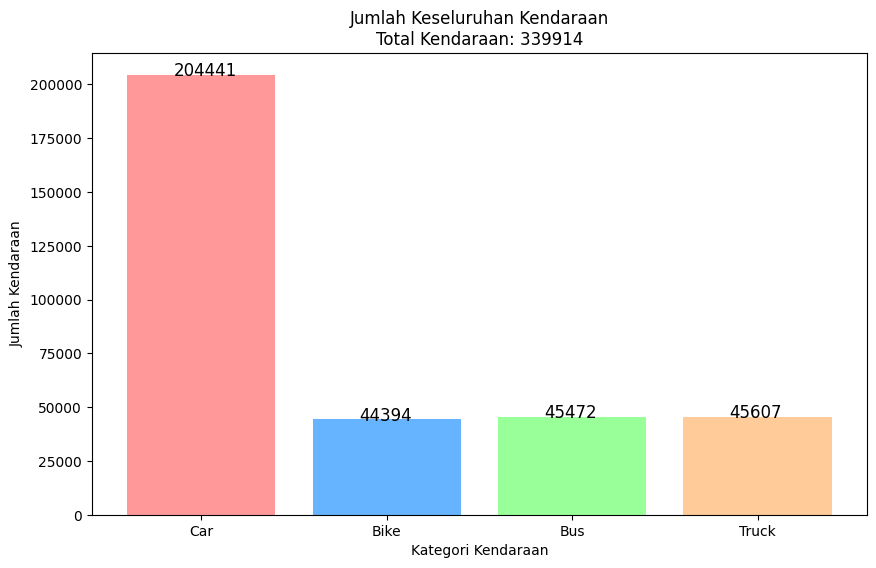

In [ ]:
total_car = df['CarCount'].sum()
total_bike = df['BikeCount'].sum()
total_bus = df['BusCount'].sum()
total_truck = df['TruckCount'].sum()
total_all = total_car + total_bike + total_bus + total_truck

# Menyiapkan data untuk visualisasi
categories = ['Car', 'Bike', 'Bus', 'Truck']
totals = [total_car, total_bike, total_bus, total_truck]

# Membuat plot bar
plt.figure(figsize=(10, 6))
bars = plt.bar(categories, totals, color=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.xlabel('Kategori Kendaraan')
plt.ylabel('Jumlah Kendaraan')
plt.title('Jumlah Keseluruhan Kendaraan\nTotal Kendaraan: {}'.format(total_all))

# Menampilkan label untuk setiap bar
for bar, total in zip(bars, totals):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() - 500, str(total), color='black', fontsize=12)

# Menampilkan plot
plt.show()

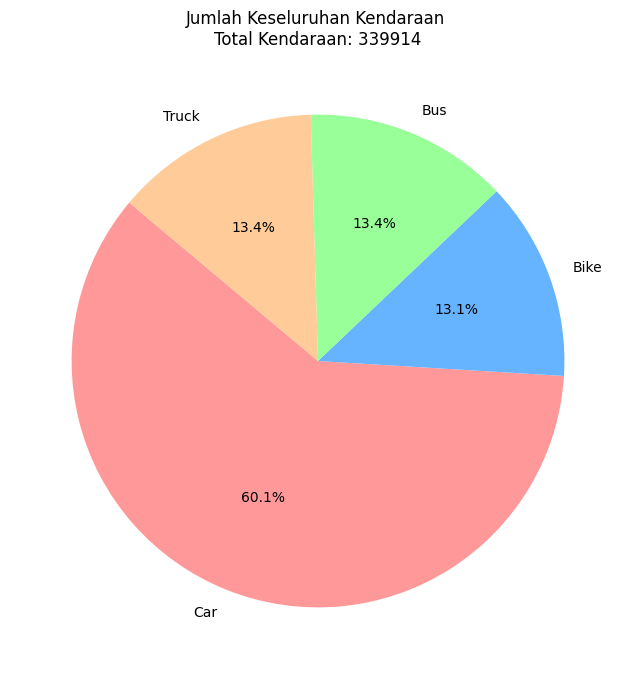

In [ ]:
# Menghitung total kendaraan
total_car = df['CarCount'].sum()
total_bike = df['BikeCount'].sum()
total_bus = df['BusCount'].sum()
total_truck = df['TruckCount'].sum()
total_all = total_car + total_bike + total_bus + total_truck

# Menyiapkan data untuk visualisasi
categories = ['Car', 'Bike', 'Bus', 'Truck']
totals = [total_car, total_bike, total_bus, total_truck]

# Membuat plot pie
plt.figure(figsize=(8, 8))
plt.pie(totals, labels=categories, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Jumlah Keseluruhan Kendaraan \nTotal Kendaraan: {}'.format(total_all))

# Menampilkan plot
plt.show()

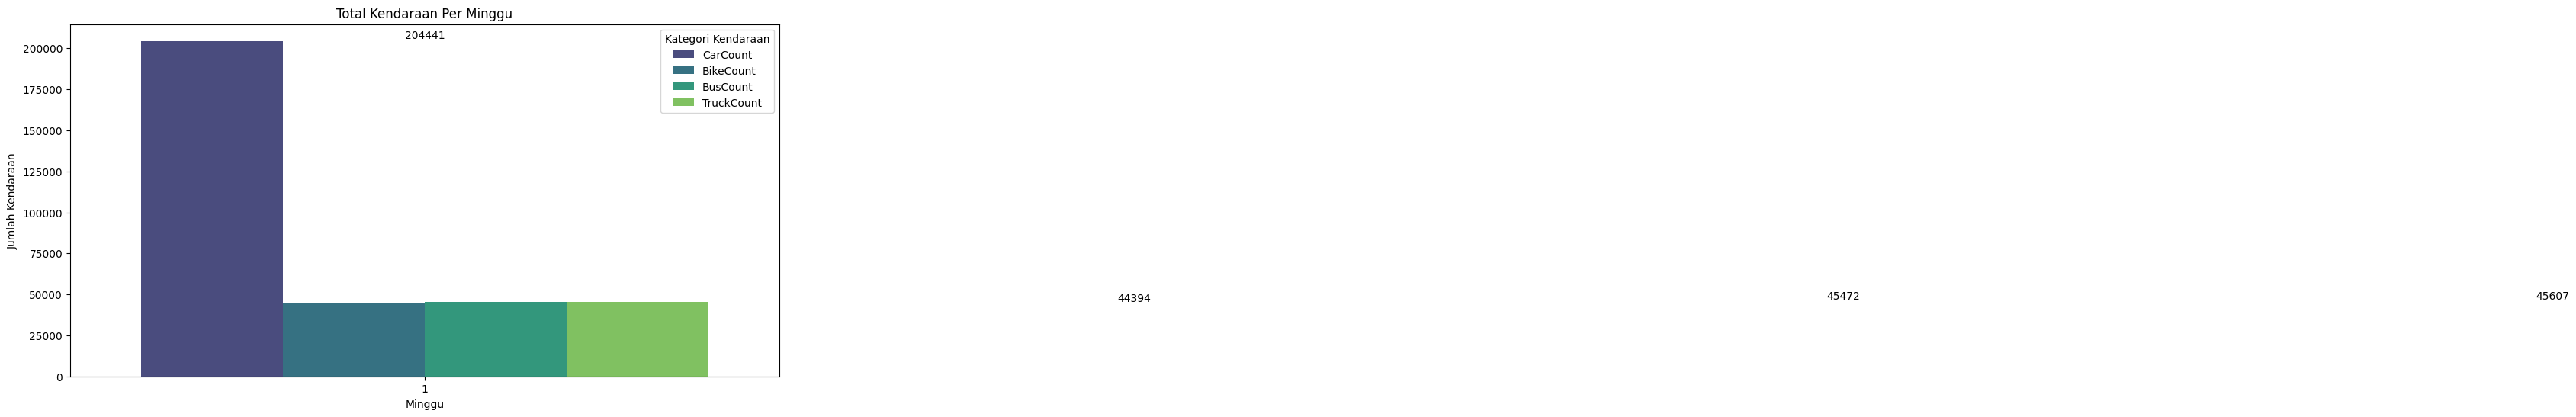

Rata-rata Kendaraan per Minggu:
CarCount      68.696573
BikeCount     14.917339
BusCount      15.279570
TruckCount    15.324933
dtype: float64


In [ ]:
# Mengganti 'date' menjadi tipe data datetime
df['Date'] = pd.to_datetime(df['Date'])

# Menambahkan kolom 'week' yang berisi minggu dari setiap tanggal
df['week'] = df['Date'].dt.isocalendar().week

# Mengelompokkan data berdasarkan minggu dan menghitung total untuk setiap jenis kendaraan
weekly_counts = df.groupby('week')[['CarCount', 'BikeCount', 'BusCount', 'TruckCount']].sum()

# Melt DataFrame untuk mempermudah plotting
melted_df = pd.melt(weekly_counts.reset_index(), id_vars=['week'], var_name='VehicleType', value_name='Count')

# Bar untuk total kendaraan per minggu
plt.figure(figsize=(12, 6))
sns.barplot(x='week', y='Count', hue='VehicleType', data=melted_df, palette="viridis")

# Menambahkan nilai label pada batang diagram
for index, value in enumerate(melted_df['Count']):
    plt.text(index, value + 2, str(value), ha='center', va='bottom')

# Memberi judul dan label sumbu
plt.title('Total Kendaraan Per Minggu')
plt.xlabel('Minggu')
plt.ylabel('Jumlah Kendaraan')

plt.legend(title='Kategori Kendaraan')

plt.show()

# Menghitung rata-rata per minggu
weekly_averages = df.groupby('week')[['CarCount', 'BikeCount', 'BusCount', 'TruckCount']].mean().mean(axis=0)
print("Rata-rata Kendaraan per Minggu:")
print(weekly_averages)

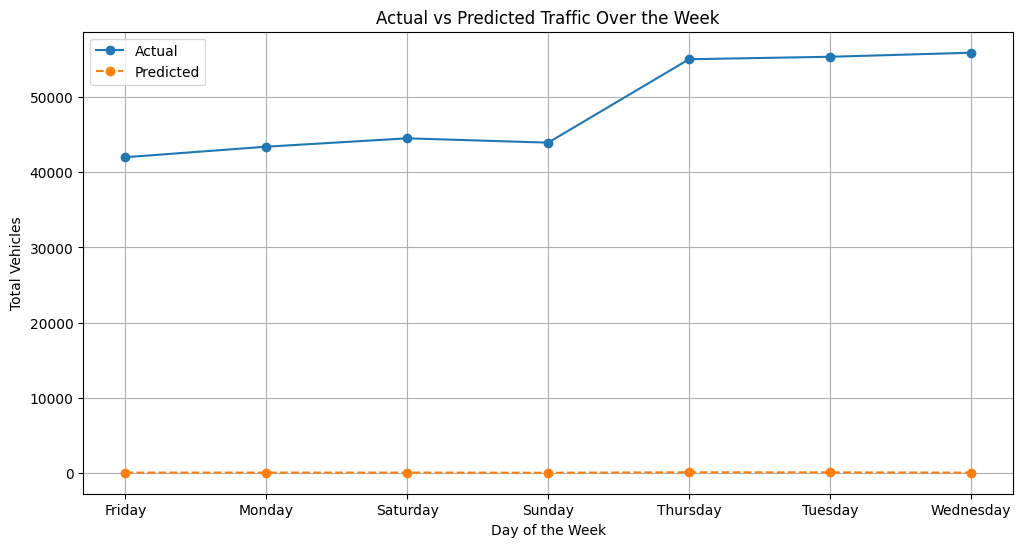

In [ ]:

np.random.seed(42)  # Untuk hasil yang konsisten
pred_df = pd.DataFrame({
    'Day of the week': df['Day of the week'].unique(),
    'predicted_total': np.random.randint(80, 150, size=len(df['Day of the week'].unique()))
})

# Menghitung Total kendaraan aktual
total_actual = df.groupby('Day of the week')['Total'].sum().reset_index()

# Menghitung Total kendaraan prediksi
total_predicted = pred_df.groupby('Day of the week')['predicted_total'].sum().reset_index()

# Plotting line chart
plt.figure(figsize=(12, 6))

# Plot Total kendaraan aktual
plt.plot(total_actual['Day of the week'], total_actual['Total'], marker='o', label='Actual')

# Plot Total kendaraan prediksi
plt.plot(total_predicted['Day of the week'], total_predicted['predicted_total'], marker='o', linestyle='dashed', label='Predicted')

# Menambahkan label dan judul
plt.xlabel('Day of the Week')
plt.ylabel('Total Vehicles')
plt.title('Actual vs Predicted Traffic Over the Week')
plt.legend()
plt.grid(True)
plt.show()

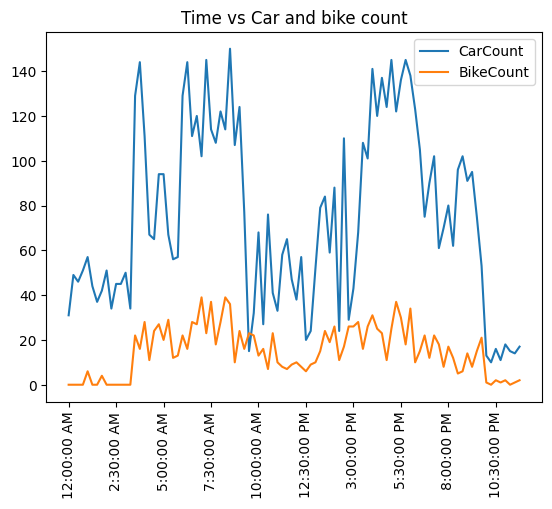

In [ ]:
plt.plot(df_1d['Time'], df_1d['CarCount'])
plt.plot(df_1d['Time'], df_1d['BikeCount'])
plt.legend(df.columns[3:5])
plt.title('Time vs Car and bike count')
plt.xticks(rotation=90, ticks=df_1d['Time'][::10])  # Display every 10th label
plt.show()

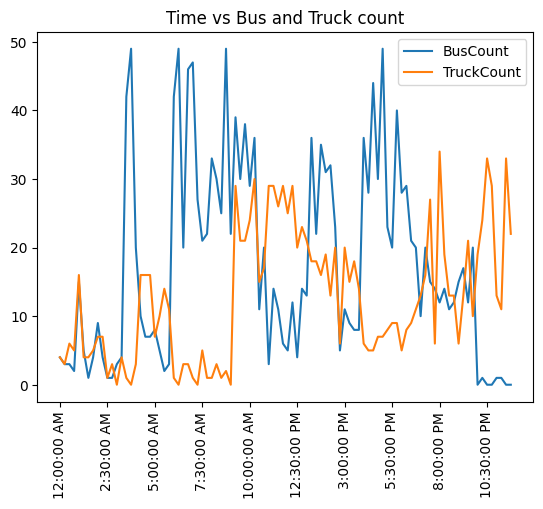

In [ ]:
plt.plot(df_1d['Time'], df_1d['BusCount'])
plt.plot(df_1d['Time'], df_1d['TruckCount'])
plt.title('Time vs Bus and Truck count')
plt.legend(df.columns[5:7])
plt.xticks(rotation=90, ticks=df_1d['Time'][::10])  # Display every 10th label
plt.show()

<Axes: xlabel='Date', ylabel='Count'>

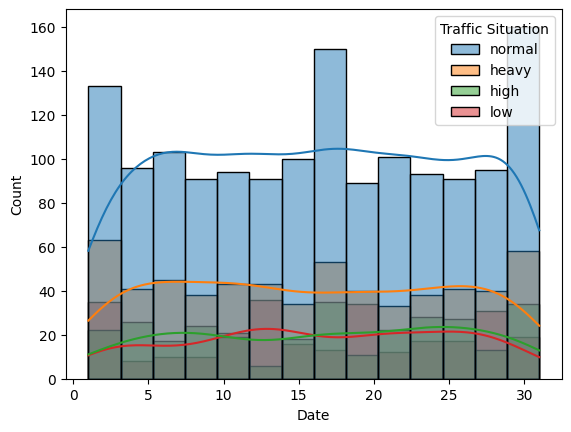

In [ ]:
 sns.histplot(df,x='Date',hue='Traffic Situation',kde=True)

<Axes: xlabel='CarCount', ylabel='Count'>

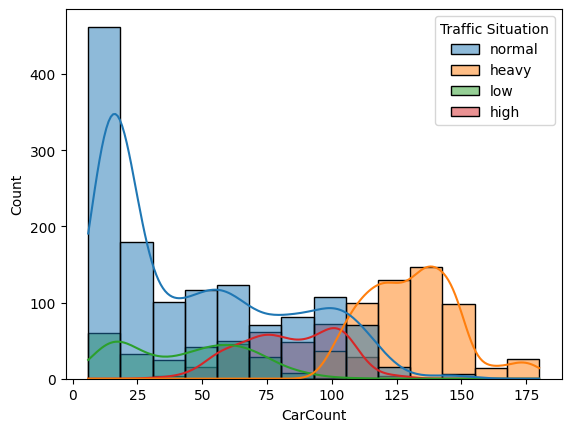

In [ ]:
sns.histplot(df,x='CarCount',hue='Traffic Situation',kde=True)


<Axes: xlabel='BikeCount', ylabel='Count'>

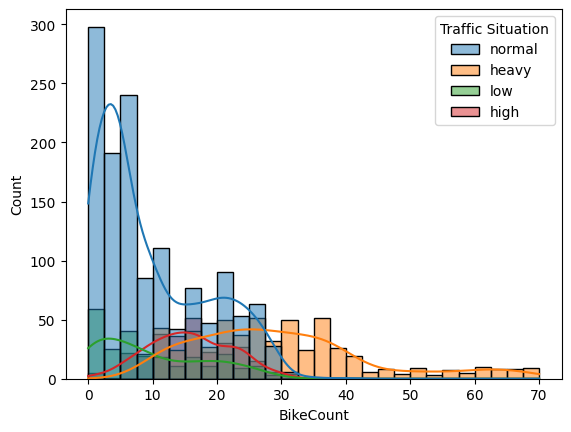

In [ ]:
sns.histplot(df,x='BikeCount',hue='Traffic Situation',kde=True)


<Axes: xlabel='BusCount', ylabel='Count'>

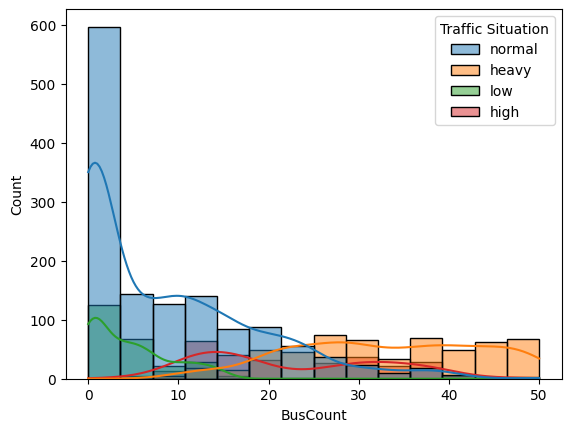

In [ ]:
sns.histplot(df,x='BusCount',hue='Traffic Situation',kde=True)


<Axes: xlabel='TruckCount', ylabel='Count'>

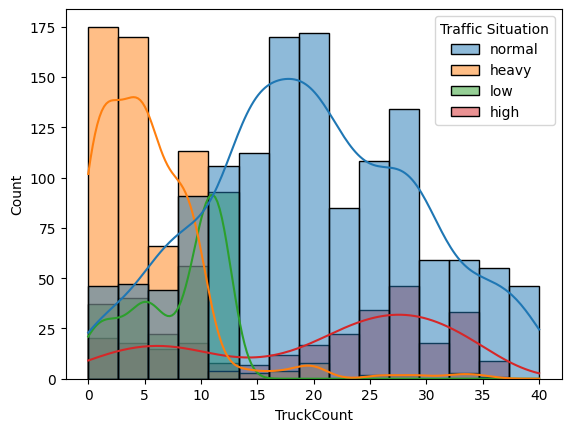

In [ ]:
sns.histplot(df,x='TruckCount',hue='Traffic Situation',kde=True)
